## Importing Libraries

In [11]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms

In [12]:
from utils import *
from model_1 import *

## Transformations applied on train and test data

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))
                                       ])

## Downloading data

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [5]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## Sample image

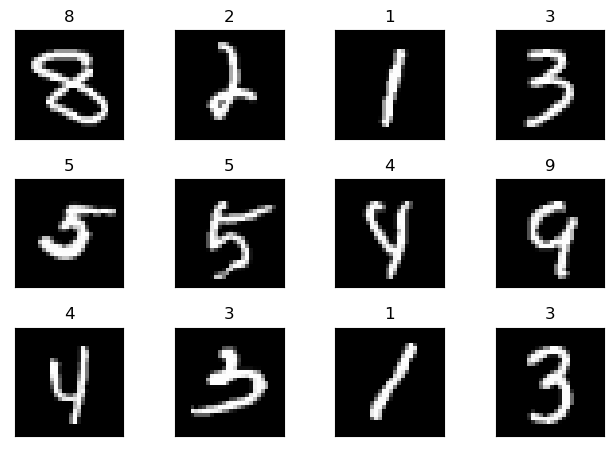

In [6]:

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

## Neural net summary

In [7]:
get_summary(Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
            Conv2d-2           [-1, 32, 24, 24]           4,640
         MaxPool2d-3           [-1, 32, 12, 12]               0
            Conv2d-4            [-1, 4, 12, 12]             132
            Conv2d-5           [-1, 16, 10, 10]             592
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7             [-1, 10, 5, 5]             170
            Conv2d-8             [-1, 10, 1, 1]           2,510
Total params: 8,204
Trainable params: 8,204
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.28
Params size (MB): 0.03
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


<function torchsummary.torchsummary.summary(model, input_size, batch_size=-1, device='cuda')>

## Training the data and calculating validation results

In [8]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [14]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

train_criterion = nn.CrossEntropyLoss() #Loss function
test_criterion = nn.CrossEntropyLoss() #Loss function
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc_val, train_loss = train(model, device, train_loader, optimizer, train_criterion)
    print(train_acc_val)
    test_acc_val, test_loss = test(model, device, test_loader, test_criterion)
    
    train_acc.append(train_acc_val) #Storing training loss for each epoch
    train_losses.append(train_loss)
    test_acc.append(test_acc_val) #Storing testing loss for each epoch
    test_losses.append(test_loss)
 

Epoch 1


Train: Loss=1.4854 Batch_id=468 Accuracy=36.15: 100%|█| 469/469 [00:42<00:00, 11

36.145


Test set: Average loss: 1.4259, Accuracy: 4975/10000 (49.75%)

Epoch 2


Train: Loss=1.0741 Batch_id=468 Accuracy=50.48: 100%|█| 469/469 [00:40<00:00, 11

50.483333333333334


Test set: Average loss: 1.1893, Accuracy: 5034/10000 (50.34%)

Epoch 3


Train: Loss=1.1036 Batch_id=468 Accuracy=50.76: 100%|█| 469/469 [00:43<00:00, 10

50.755


Test set: Average loss: 1.1825, Accuracy: 5017/10000 (50.17%)

Epoch 4


Train: Loss=1.0987 Batch_id=468 Accuracy=50.76: 100%|█| 469/469 [00:51<00:00,  9

50.76


Test set: Average loss: 1.1936, Accuracy: 5022/10000 (50.22%)

Epoch 5


Train: Loss=0.9700 Batch_id=468 Accuracy=50.83: 100%|█| 469/469 [00:55<00:00,  8

50.83


Test set: Average loss: 1.1784, Accuracy: 5044/10000 (50.44%)

Epoch 6


Train: Loss=1.3100 Batch_id=468 Accuracy=50.88: 100%|█| 469/469 [00:56<00:00,  8

50.88333333333333


Test set: Average loss: 1.1705, Accuracy: 5054/10000 (50.54%)

Epoch 7


Train: Loss=1.0139 Batch_id=468 Accuracy=51.01: 100%|█| 469/469 [00:56<00:00,  8

51.01


Test set: Average loss: 1.1609, Accuracy: 5068/10000 (50.68%)

Epoch 8


Train: Loss=1.1981 Batch_id=468 Accuracy=50.96: 100%|█| 469/469 [01:02<00:00,  7

50.958333333333336


Test set: Average loss: 1.1623, Accuracy: 5064/10000 (50.64%)

Epoch 9


Train: Loss=1.2067 Batch_id=468 Accuracy=50.98: 100%|█| 469/469 [01:08<00:00,  6

50.97666666666667


Test set: Average loss: 1.1673, Accuracy: 5046/10000 (50.46%)

Epoch 10


Train: Loss=1.2026 Batch_id=468 Accuracy=50.96: 100%|█| 469/469 [01:08<00:00,  6

50.961666666666666


Test set: Average loss: 1.1682, Accuracy: 5061/10000 (50.61%)

Epoch 11


Train: Loss=1.0416 Batch_id=468 Accuracy=50.98: 100%|█| 469/469 [01:13<00:00,  6

50.98166666666667


Test set: Average loss: 1.1607, Accuracy: 5063/10000 (50.63%)

Epoch 12


Train: Loss=1.2673 Batch_id=468 Accuracy=51.01: 100%|█| 469/469 [01:18<00:00,  6

51.01166666666666


Test set: Average loss: 1.1639, Accuracy: 5054/10000 (50.54%)

Epoch 13


Train: Loss=1.1123 Batch_id=468 Accuracy=51.00: 100%|█| 469/469 [01:27<00:00,  5

50.998333333333335


Test set: Average loss: 1.1678, Accuracy: 5060/10000 (50.60%)

Epoch 14


Train: Loss=1.0641 Batch_id=468 Accuracy=54.15: 100%|█| 469/469 [01:31<00:00,  5

54.153333333333336


Test set: Average loss: 0.9879, Accuracy: 5920/10000 (59.20%)

Epoch 15


Train: Loss=0.9031 Batch_id=468 Accuracy=59.80: 100%|█| 469/469 [01:06<00:00,  7

59.80166666666667


Test set: Average loss: 0.9710, Accuracy: 5921/10000 (59.21%)

Epoch 16


Train: Loss=0.8642 Batch_id=468 Accuracy=59.90: 100%|█| 469/469 [01:02<00:00,  7

59.89666666666667


Test set: Average loss: 1.0236, Accuracy: 5800/10000 (58.00%)

Epoch 17


Train: Loss=0.9138 Batch_id=468 Accuracy=59.89: 100%|█| 469/469 [00:52<00:00,  8

59.89


Test set: Average loss: 0.9661, Accuracy: 5924/10000 (59.24%)

Epoch 18


Train: Loss=0.9817 Batch_id=468 Accuracy=59.92: 100%|█| 469/469 [00:55<00:00,  8

59.925


Test set: Average loss: 0.9588, Accuracy: 5936/10000 (59.36%)

Epoch 19


Train: Loss=0.9381 Batch_id=468 Accuracy=59.95: 100%|█| 469/469 [00:53<00:00,  8

59.94833333333333


Test set: Average loss: 0.9589, Accuracy: 5944/10000 (59.44%)

Epoch 20


Train: Loss=0.8295 Batch_id=468 Accuracy=60.00: 100%|█| 469/469 [00:55<00:00,  8

60.00333333333333


Test set: Average loss: 0.9655, Accuracy: 5937/10000 (59.37%)



## Plots

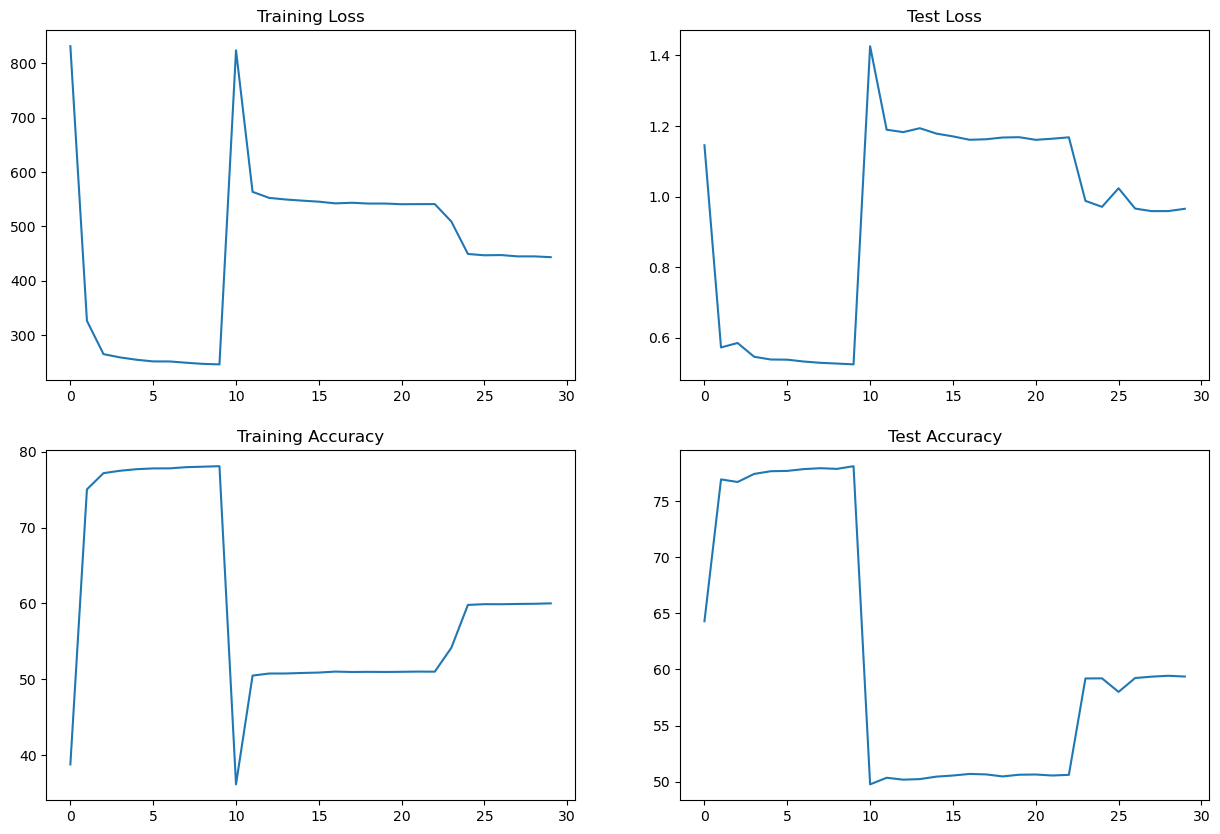

In [15]:
plot_loss(train_losses, train_acc, test_losses, test_acc)

### Target:

* Get the initial set up - training, testing, basic structure of the code, data loader etc.
* Keep the parameters as low as possible (~8000) to stay below the parameter limit for this assignment and see the initial training and test accuracy 

### Results:
* Parameters: 8204
* Best Training Accuracy: 60%
* Best Test Accuracy: 59.37%

### Analysis:
* Extremely bad accuracy
* Both train and test accracy are much below the target mark. Ways to improve it includes
    - Batch normalisation
    - Add GAP instead of 5x5 kernal
* Training accuracy is consistently more than the test accuracy - although not a lot, there are slight signs of over fitting. Test accuracy can be improved with respect to training accuracy by 
    - transforming training data
    - adding dropout layers

